# Exercise 2
## Group members:
* Antonio Feltrin
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

#### Import all dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd

#### Generation of data: as CASE 1 - for one-hot encoding

In [2]:
# random seed for reproducibility
np.random.seed(12345)

# size of dataset
N = 10000
# number of block for one-hot encoding
G = 5
# number of categories
A = 4
# number of categories of kind 0
A0 = int(A/2)
# number of categories of kind 1
A1 = A-A0
#
AA = [A0, A1]
# size of each data point
L = G*A
#  
# Noise: probability q to change category
q = 0.  # 0.1 then 
#
a = 0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

for n in range(N):
    # kind of the first slot
    k = np.random.randint(0,2)
    # label
    y[n] = k
    i0=0
    for g in range(G):
        # normal choice
        i = np.random.randint(0, AA[k])
        j = i + i0 + k*A0
        if np.random.random()<q:
            # normal choice
            i = np.random.randint(0,A)
            j = i + i0
        
        if(n<2): 
            print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
        # one-hot encoding
        x[n][j] = 1
        i0= i0 + A
        k = 1 - k
                
    if(n<3): print(x[n], y[n])

print("...")    

L=20, A=4, G=5
k=0, g=0, i0=0, i=1, j=1, AA[k]=2
k=1, g=1, i0=4, i=0, j=6, AA[k]=2
k=0, g=2, i0=8, i=0, j=8, AA[k]=2
k=1, g=3, i0=12, i=1, j=15, AA[k]=2
k=0, g=4, i0=16, i=1, j=17, AA[k]=2
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0] 0
k=1, g=0, i0=0, i=1, j=3, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=1, j=13, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1] 1
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0] 1
...


#### Show generated data

In [3]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 6 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 8 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 9 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 10 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 11 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1

### Check if one of the following points improve and/or stabilize the performance of the RBM.
# 1. Use bits [0,1] or [-1,1]. Is reading weights easier in one of the two cases?

In [5]:
# To answer this question we simulate both the cases, starting from the [0, 1] case

# We name "v" for "visible" instead of using x
v = x.copy()
# store in v0, because later we will shuffle v
v0 = np.copy(v)

# We start by considering bits [0, 1]
GAP = 1
vmin = 0

# RBM, number of hidden units
M = 6

# range of each initial weight
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08357155  0.1955278  -0.21205997 -0.22687595]
 [ 0.80252656  0.56885555  0.03792948  0.11502239]
 [ 0.31395215  0.50885485  0.41118333 -0.52918005]]
a = [ 0.02094971 -0.47263699  0.33341921]
...


In [4]:
# RBM, number of hidden units
M = 6

#### Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1]


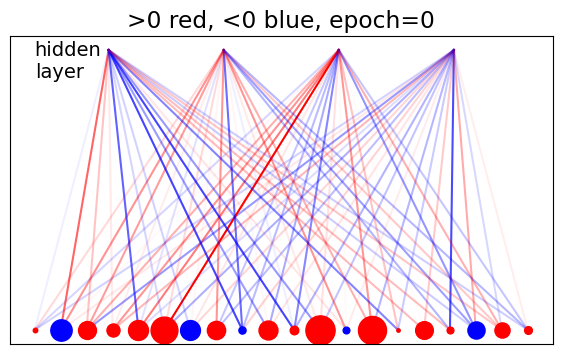

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [10]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in, wei, bias, DE, info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input =', v_in)
        print('act =', act)
        print('prob =', prob)
        print('output =', v_out)
    return v_out

k = 0
activate(v[k], w, b, GAP, info=True)

input = [-1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1]
act = [ 2.50559874 -2.60101007 -3.25483145  4.76680988]
prob = [0.99338118 0.00547529 0.00148677 0.99992763]
output = [ 1 -1 -1  1]


array([ 1, -1, -1,  1])

#### Train

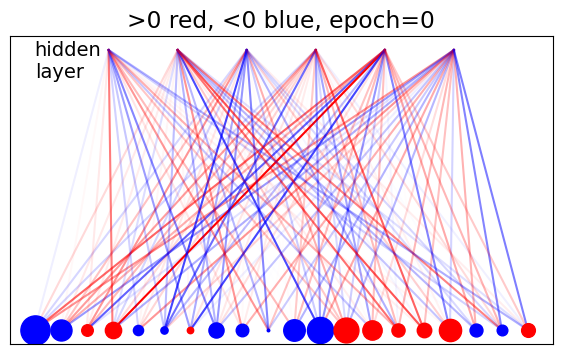

----------- epoch = 0   k= 499   m= 500
dw = [[-0.09  -0.104 -0.052 -0.1   -0.134 -0.016]
 [-0.132 -0.21  -0.056 -0.152 -0.222 -0.06 ]
 [-0.256 -0.304 -0.104 -0.32  -0.286 -0.13 ]
 [-0.376 -0.472 -0.164 -0.416 -0.404 -0.216]
 [-0.194 -0.31  -0.05  -0.262 -0.23  -0.168]
 [-0.078 -0.108  0.018 -0.108 -0.104 -0.054]
 [-0.03  -0.034  0.014 -0.05  -0.066  0.03 ]
 [ 0.014 -0.03   0.024 -0.008 -0.006  0.018]
 [-0.228 -0.238 -0.09  -0.224 -0.268 -0.09 ]
 [-0.184 -0.206 -0.072 -0.154 -0.21  -0.09 ]
 [-0.228 -0.258 -0.066 -0.242 -0.234 -0.09 ]
 [ 0.024 -0.014  0.048 -0.032  0.006  0.02 ]
 [-0.334 -0.444 -0.156 -0.374 -0.388 -0.214]
 [-0.254 -0.308 -0.064 -0.282 -0.286 -0.17 ]
 [-0.284 -0.398 -0.144 -0.36  -0.39  -0.176]
 [-0.342 -0.394 -0.162 -0.35  -0.366 -0.172]
 [-0.156 -0.192 -0.096 -0.17  -0.218 -0.07 ]
 [-0.15  -0.154 -0.064 -0.142 -0.156 -0.044]
 [-0.208 -0.276 -0.044 -0.228 -0.256 -0.078]
 [-0.128 -0.214 -0.044 -0.2   -0.176 -0.034]]
da = [-0.09  -0.204 -0.32  -0.514 -0.308 -0.062 -0.036

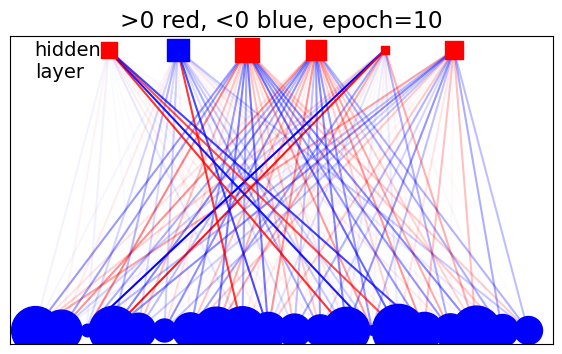

l_rate =  0.9090909090909092


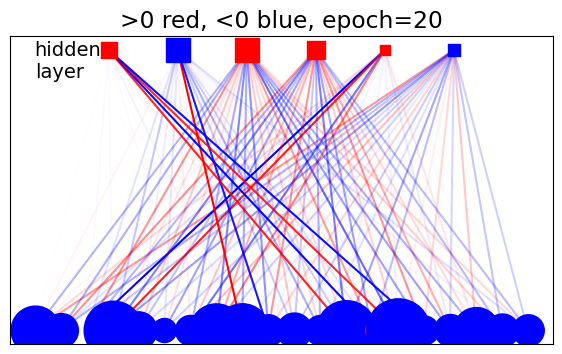

l_rate =  0.8333333333333337


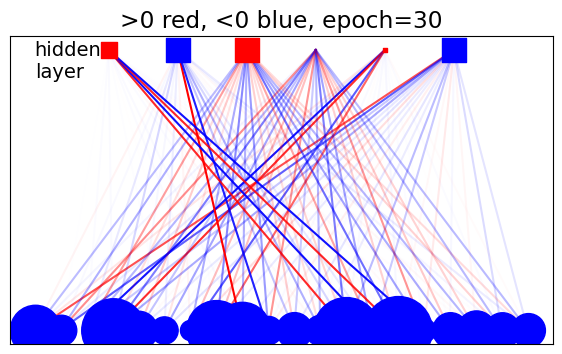

l_rate =  0.7692307692307697


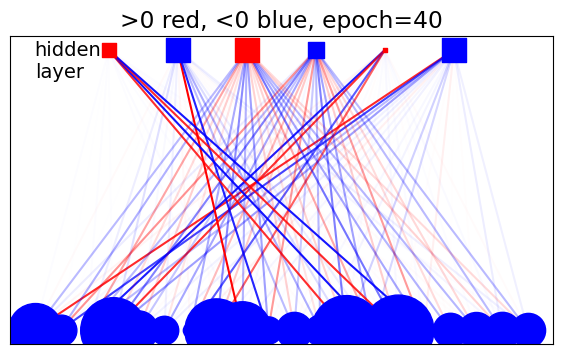

l_rate =  0.7142857142857149


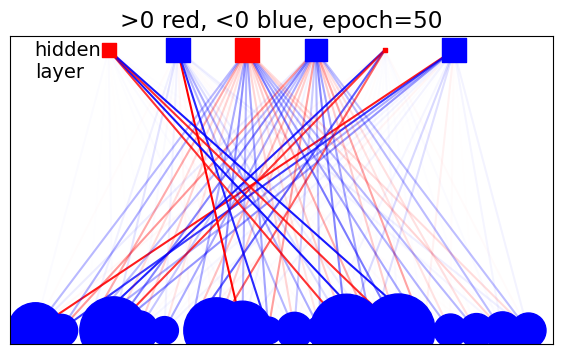

l_rate =  0.6666666666666671


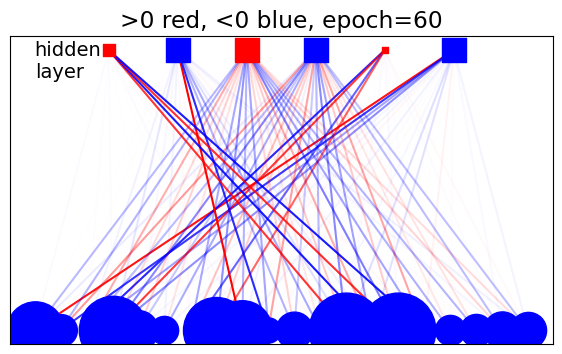

l_rate =  0.6250000000000006


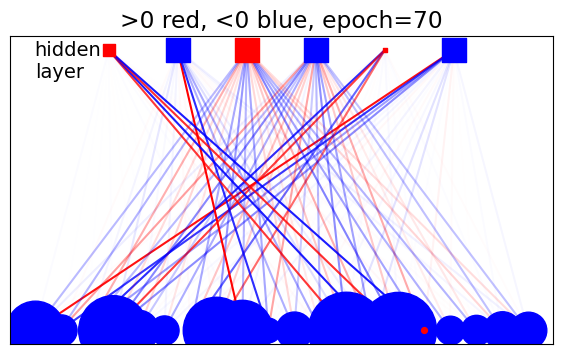

l_rate =  0.5882352941176475


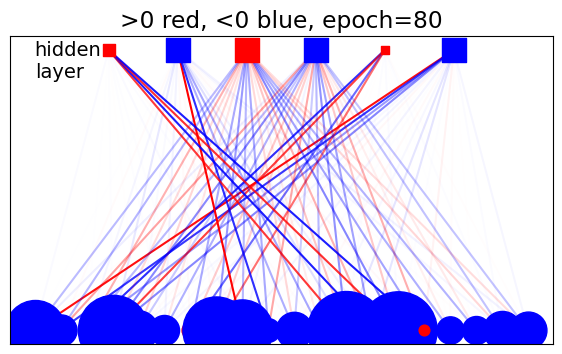

l_rate =  0.555555555555556


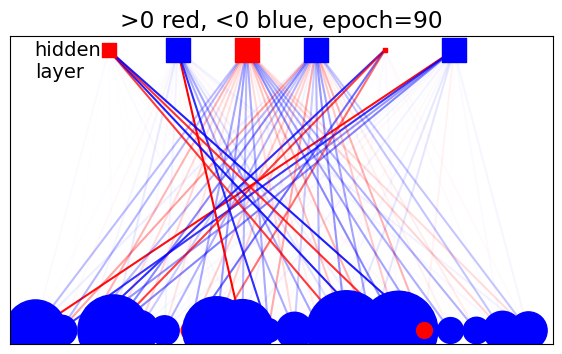

l_rate =  0.5263157894736847


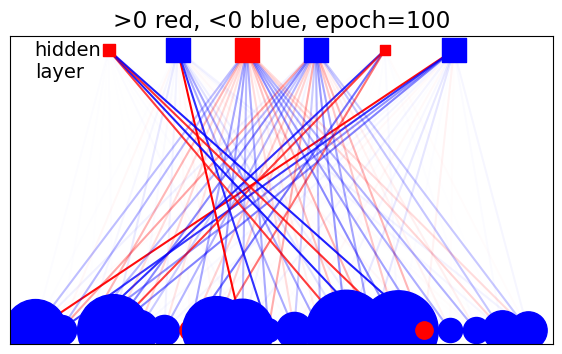

l_rate =  0.5000000000000009


In [7]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h # CD-1 here, so only one iteration
        h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)  # fantasy unit
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD -- simplest as possible
            dw = l_rate_m*(vh_data - vh_model)  # gradient variable
            da = l_rate_m*(v_data - v_model)    # gradient variable
            db = l_rate_m*(h_data - h_model)    # gradient variable
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [8]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0

In [9]:
w

array([[-1.20773610e-01, -7.35576048e-02, -2.48219593e+00,
        -5.36558590e-01,  1.08777211e-01,  9.26518275e+00],
       [-6.09938867e-02,  2.65171495e-01, -2.70228490e+00,
         3.40835742e+00,  4.60783911e-02, -7.64506538e+00],
       [-4.50168601e-02, -3.12938531e-01,  2.72747795e+00,
        -2.68062369e+00, -7.91902362e+00, -4.16727491e+00],
       [-5.94231588e-02, -8.53791035e-01,  1.24436306e+00,
        -4.51665872e+00,  7.30261352e+00, -4.74532815e+00],
       [-1.84623322e-02, -2.02613359e-01,  1.49309588e+00,
        -2.02454327e+00,  4.50247707e-02, -2.38275417e-01],
       [-2.36304274e-02, -4.45187330e-01,  9.78218903e-01,
        -2.84505882e+00, -4.53118324e-02, -3.39356793e-01],
       [-4.03888667e-02,  1.56258182e-01, -3.33054261e+00,
         1.71305128e+00, -5.28288644e+00,  2.32545683e-01],
       [-1.20385163e-02,  2.39381701e-01, -3.60705431e+00,
         1.69220297e+00,  5.29689391e+00,  7.62095057e-02],
       [-1.48812941e-01,  9.72684058e+00, -2.650

In [10]:
diff

array([[ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. , -0.5],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , -0.5,  0. ]])

In [11]:
diff.mean(), diff.std()

(-0.0311725, 0.1662213140477177)

In [7]:
# We now consider bits [-1, 1]
# We name "v" for "visible" instead of using x
v = x.copy()
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# sigmoid takes into account energy difference =2
GAP = 2 # is given by setting Energy levels = +- 1 and from the Boltzmann distribution getting a sigmoid function with coefficient 2 at the exponent
# convert 0,1 -> -1,1
v = 2*v - 1
vmin = -1

In [8]:
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08357155  0.1955278  -0.21205997 -0.22687595]
 [ 0.80252656  0.56885555  0.03792948  0.11502239]
 [ 0.31395215  0.50885485  0.41118333 -0.52918005]]
a = [ 0.02094971 -0.47263699  0.33341921]
...


In [11]:
k = 0
activate(v[k], w, b, GAP, info=True)

input = [-1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1]
act = [ 2.50559874 -2.60101007 -3.25483145  4.76680988]
prob = [0.99338118 0.00547529 0.00148677 0.99992763]
output = [ 1 -1 -1  1]


array([ 1, -1, -1,  1])

#### Train

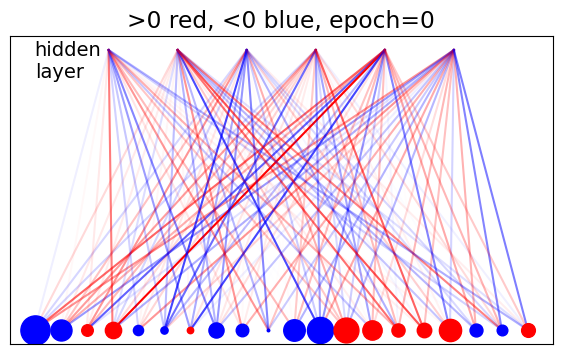

----------- epoch = 0   k= 499   m= 500
dw = [[-0.028  0.192 -0.032  0.068 -0.272  0.024]
 [-0.052  0.064 -0.168  0.148 -0.368  0.272]
 [-0.104 -0.308 -0.516 -0.4    0.356 -0.164]
 [-0.308 -0.08   0.032 -0.172 -0.312 -0.224]
 [ 0.252 -0.288  0.048 -0.284  0.288 -0.608]
 [ 0.248  0.164  0.332  0.208  0.148 -0.564]
 [ 0.38   0.296 -0.232  0.252  0.272  0.088]
 [ 0.348  0.312  0.104  0.428  0.144  0.12 ]
 [-0.264  0.052 -0.068  0.104 -0.028 -0.068]
 [-0.104  0.22  -0.156  0.352 -0.252  0.044]
 [-0.208  0.06  -0.012 -0.256 -0.1   -0.156]
 [ 0.044  0.312  0.256  0.172  0.096 -0.248]
 [-0.02  -0.256 -0.544 -0.148  0.328 -0.208]
 [-0.124 -0.008 -0.144  0.132  0.128 -0.384]
 [-0.052 -0.496 -0.448 -0.188 -0.096 -0.16 ]
 [-0.304 -0.412 -0.348 -0.216  0.092  0.02 ]
 [ 0.172  0.272 -0.464  0.42   0.256  0.048]
 [-0.112  0.5   -0.028  0.432 -0.148  0.084]
 [-0.032 -0.148 -0.02  -0.344 -0.06   0.044]
 [ 0.164 -0.136 -0.088 -0.14   0.032  0.072]]
da = [ 0.128 -0.016 -0.804 -0.448 -0.528 -0.436 -0.408

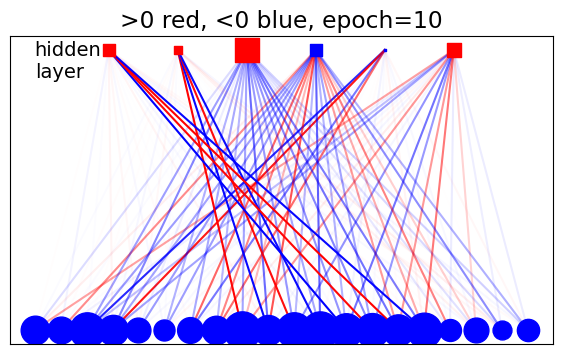

l_rate =  0.9090909090909092


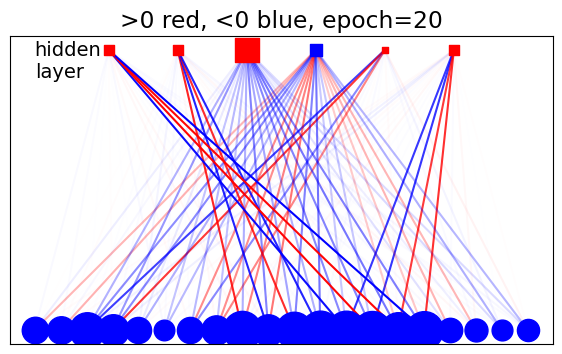

l_rate =  0.8333333333333337


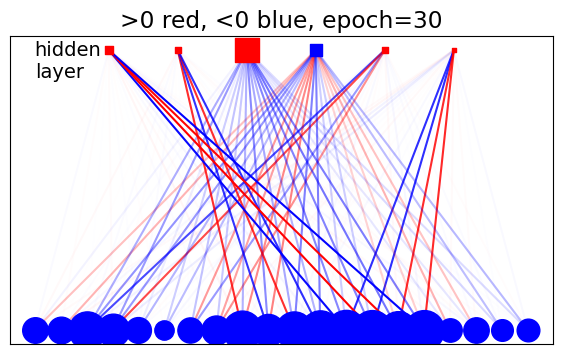

l_rate =  0.7692307692307697


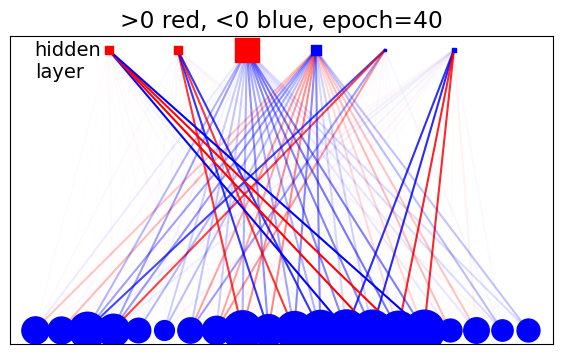

l_rate =  0.7142857142857149


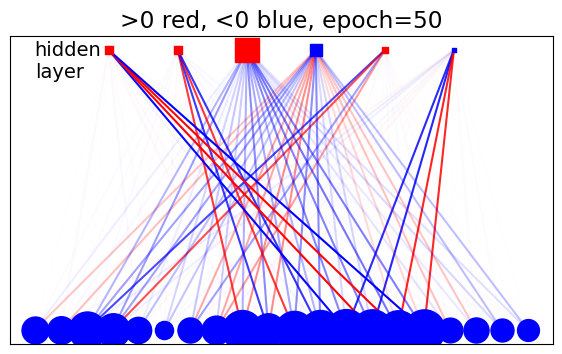

l_rate =  0.6666666666666671


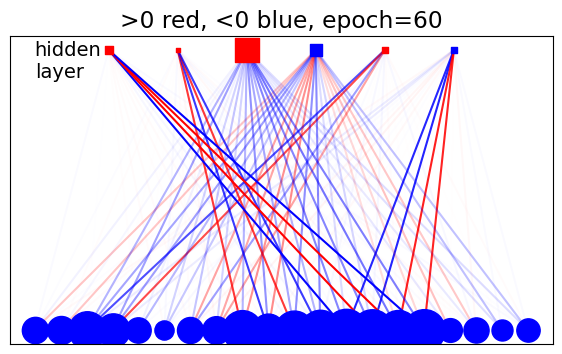

l_rate =  0.6250000000000006


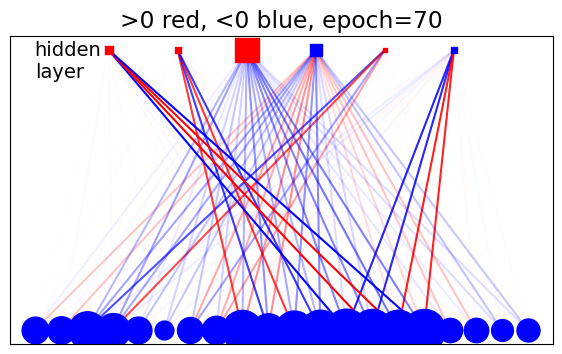

l_rate =  0.5882352941176475


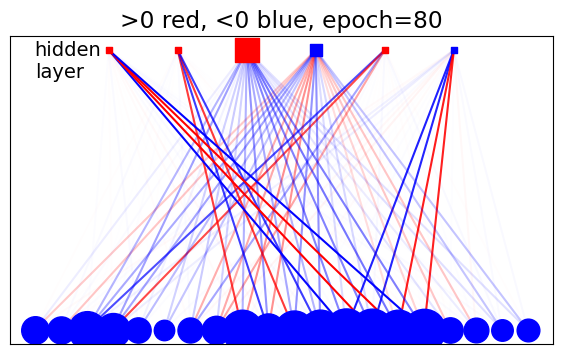

l_rate =  0.555555555555556


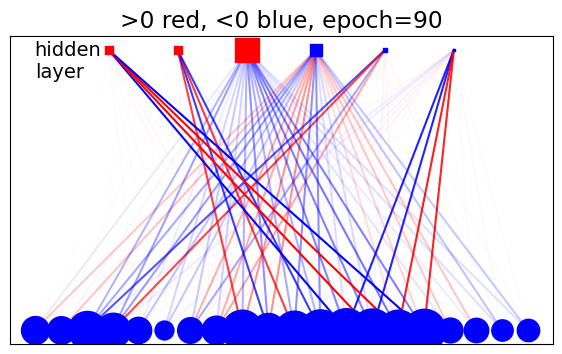

l_rate =  0.5263157894736847


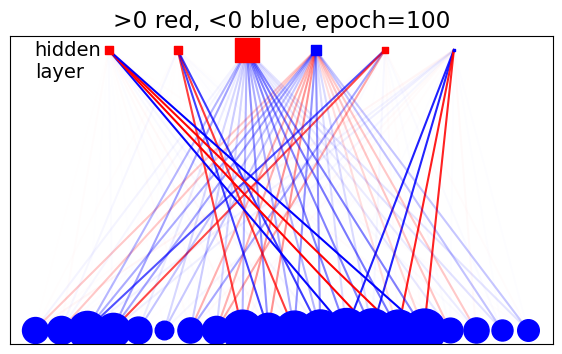

l_rate =  0.5000000000000009


In [15]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h # CD-1 here, so only one iteration
        h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)  # fantasy unit
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD -- simplest as possible
            dw = l_rate_m*(vh_data - vh_model)  # gradient variable
            da = l_rate_m*(v_data - v_model)    # gradient variable
            db = l_rate_m*(h_data - h_model)    # gradient variable
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [16]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 1 
 
 
 3 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 
 
 4 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 5 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 6 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 7 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 8 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 
 
 10 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 1 
 
 
 11 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0

In [17]:
w

array([[ 1.74383559e-02,  2.92665825e-02, -1.61901145e-01,
         7.96946631e-01,  3.14290158e-02,  1.35447237e-01],
       [ 5.05963944e-02, -1.15028977e-01, -1.16936603e-01,
         7.94728282e-01, -2.90247669e-02,  2.77141709e-02],
       [-1.82694415e-02,  2.92549663e-03, -1.06991659e+00,
        -1.21066961e+00, -2.53564538e+00, -1.69250635e-01],
       [-4.36446775e-02,  1.95601075e-02, -1.34464730e+00,
        -1.31392863e+00,  2.63035875e+00, -2.20204824e-01],
       [-1.30481123e-02,  1.24028676e-02, -2.74264062e-01,
        -8.63845265e-01,  5.69443029e-04,  1.34075035e-02],
       [ 1.24278132e-02, -6.31092293e-03, -5.79105572e-01,
        -8.02688098e-01, -1.47623616e-02, -1.22405012e-01],
       [ 3.86907831e-02,  1.84320780e-02, -7.41980925e-01,
         1.15738511e+00, -1.28500114e+00,  7.39733965e-02],
       [-3.95013790e-02, -1.20231270e-02, -6.20052077e-01,
         1.14017911e+00,  1.27459346e+00,  6.41458076e-02],
       [ 5.50038795e-02,  2.80003302e+00, -1.094

In [18]:
diff

array([[ 0.5,  0. ,  0.5, ...,  0. , -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5,  0.5,  0. ],
       [-0.5, -0.5,  0. , ..., -0.5,  0. ,  0.5],
       ...,
       [ 0. ,  0.5,  0.5, ...,  0. , -0.5, -0.5],
       [ 0. ,  0.5,  0.5, ...,  0. , -0.5, -0.5],
       [ 0.5,  0. ,  0.5, ...,  0.5, -1. , -0.5]])

In [19]:
diff.mean(), diff.std()

(-0.14504, 0.41967058319591566)

# 2. Implement Adam gradient descent algorithm in the RBM notebook.

In [5]:
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = np.zeros((L, M)), np.zeros((L, M))
        self.m_da, self.v_da = np.zeros(L), np.zeros(L)
        self.m_db, self.v_db = np.zeros(M), np.zeros(M)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        
    def update(self, t, w, a, b, dw, da, db):
        ## dw, da, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db
        # *** biases of hidden units *** #
        self.m_da = self.beta1*self.m_da + (1-self.beta1)*da

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases of hidden units *** #
        self.v_da = self.beta2*self.v_da + (1-self.beta2)*(da**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db**2)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_da_corr = self.m_da/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_da_corr = self.v_da/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        a = a - self.eta*(m_da_corr/(np.sqrt(v_da_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        m_dw, m_da, m_db = self.m_dw, self.m_da, self.m_db
        return w, a, b, m_dw, m_da, m_db

In [96]:
# def loss_function(m):
#     return m**2-2*m+1
# ## take derivative
# def grad_function(m):
#     return 2*m-2
# def check_convergence(w0, w1):
#     return (w0 == w1).all()

# For semplicity (still to understand...) we consider [-1, 1] encoding

In [6]:
# We name "v" for "visible" instead of using x
v = x.copy()
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# sigmoid takes into account energy difference =2
GAP = 2 # is given by setting Energy levels = +- 1 and from the Boltzmann distribution getting a sigmoid function with coefficient 2 at the exponent
# convert 0,1 -> -1,1
v = 2*v - 1
vmin = -1

# RBM, number of hidden units
M = 6

# range of each initial weight
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
 [ 0.03644147  0.11050993  0.30163547  0.48889193  0.39505217 -0.50841975]
 [ 0.10786059  0.08978702  0.53065764  0.34768619 -0.78510675 -0.14584864]]
a = [-0.88361978 -0.45766925  0.13869612]
...


#### Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


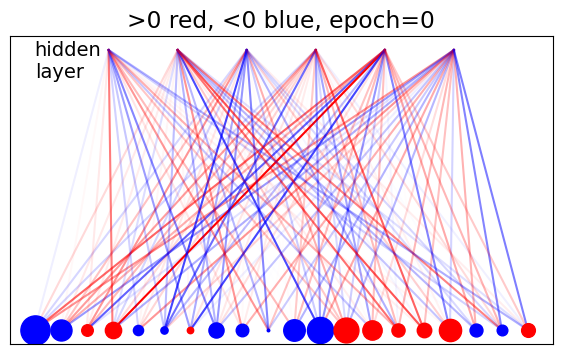

In [7]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [9]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in, wei, bias, DE, info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input =', v_in)
        print('act =', act)
        print('prob =', prob)
        print('output =', v_out)
    return v_out

k = 0
activate(v[k], w, b, GAP, info=True)

input = [-1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1]
act = [-0.49949145  1.75157813  1.59964106  1.94398951 -1.31216928  1.58169067]
prob = [0.26914144 0.97077744 0.96080725 0.97992457 0.06758836 0.95943276]
output = [-1  1  1  1 -1  1]


array([-1,  1,  1,  1, -1,  1])

#### Train with ADAM

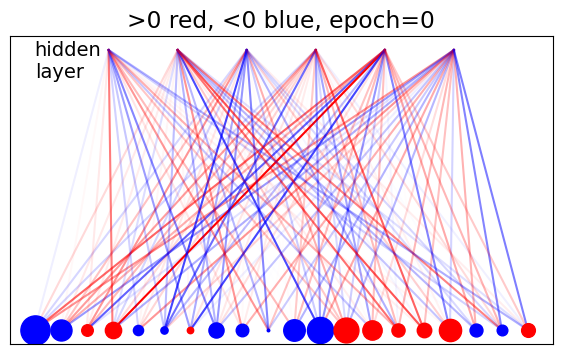

epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8


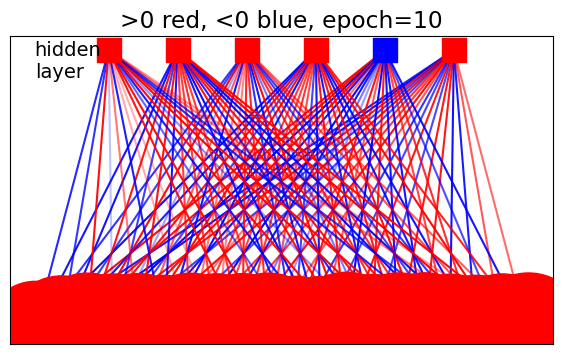

l_rate =  0.9090909090909092
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13


C:\Users\ricta\AppData\Local\Temp\ipykernel_33356\2047655505.py:6: RuntimeWarning: overflow encountered in exp
  prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function


epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18


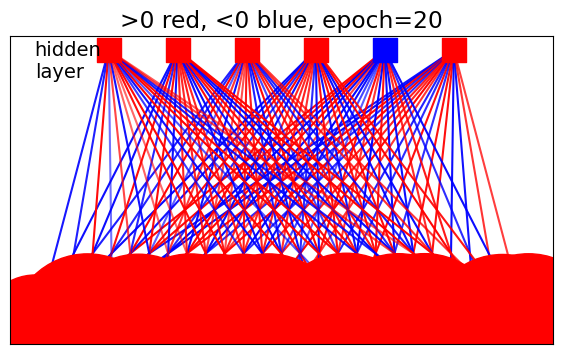

l_rate =  0.8333333333333337
epoch = 19
epoch = 20
epoch = 21
epoch = 22
epoch = 23
epoch = 24
epoch = 25
epoch = 26
epoch = 27
epoch = 28


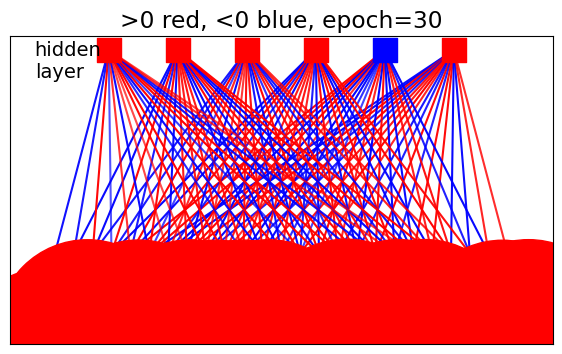

l_rate =  0.7692307692307697
epoch = 29
epoch = 30
epoch = 31
epoch = 32
epoch = 33
epoch = 34
epoch = 35
epoch = 36
epoch = 37
epoch = 38


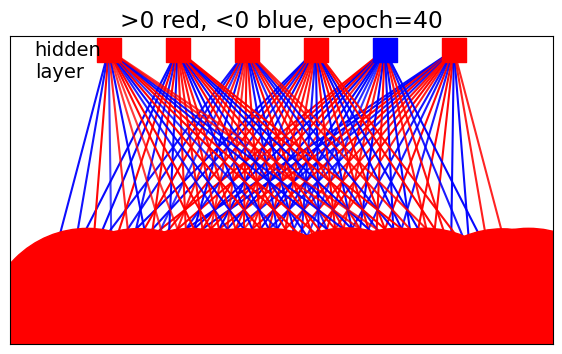

l_rate =  0.7142857142857149
epoch = 39
epoch = 40
epoch = 41
epoch = 42
epoch = 43
epoch = 44
epoch = 45
epoch = 46
epoch = 47
epoch = 48


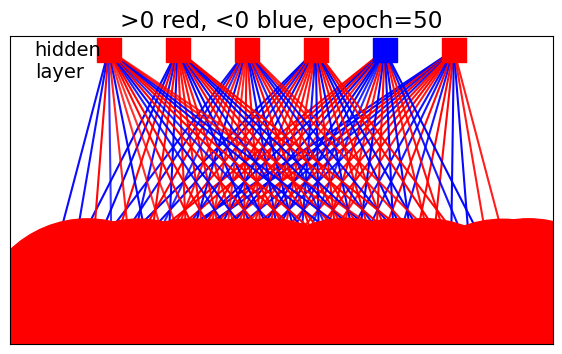

l_rate =  0.6666666666666671
epoch = 49
epoch = 50
epoch = 51
epoch = 52
epoch = 53
epoch = 54
epoch = 55
epoch = 56
epoch = 57
epoch = 58


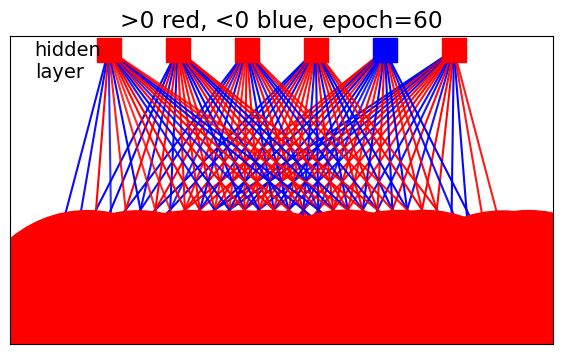

l_rate =  0.6250000000000006
epoch = 59
epoch = 60
epoch = 61
epoch = 62
epoch = 63
epoch = 64
epoch = 65
epoch = 66
epoch = 67
epoch = 68


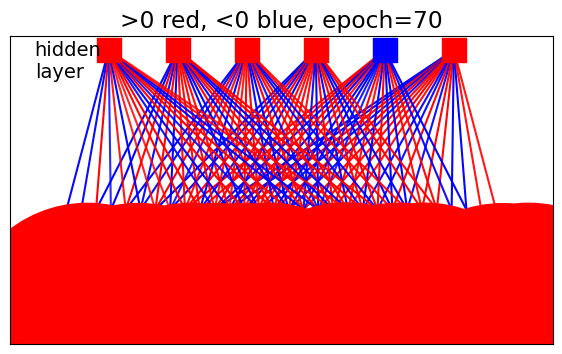

l_rate =  0.5882352941176475
epoch = 69
epoch = 70
epoch = 71
epoch = 72
epoch = 73
epoch = 74
epoch = 75
epoch = 76
epoch = 77
epoch = 78


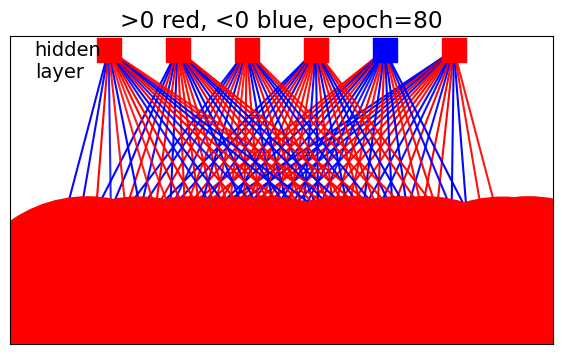

l_rate =  0.555555555555556
epoch = 79
epoch = 80
epoch = 81
epoch = 82
epoch = 83
epoch = 84
epoch = 85
epoch = 86
epoch = 87
epoch = 88


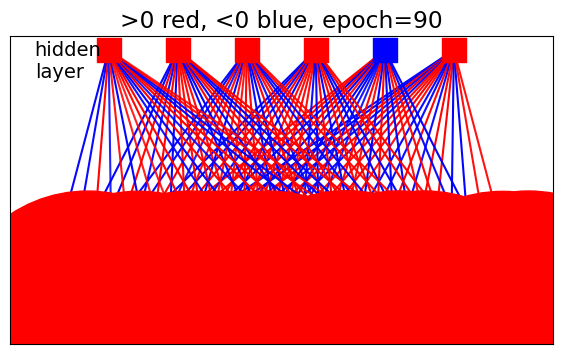

l_rate =  0.5263157894736847
epoch = 89
epoch = 90
epoch = 91
epoch = 92
epoch = 93
epoch = 94
epoch = 95
epoch = 96
epoch = 97
epoch = 98


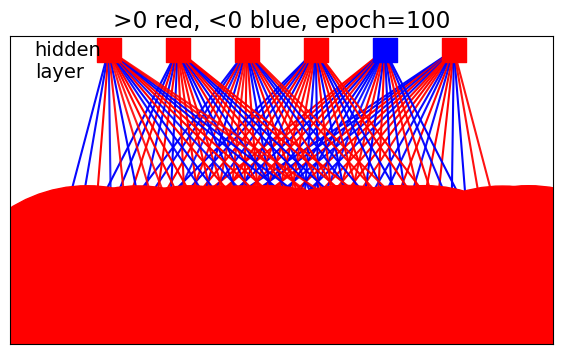

l_rate =  0.5000000000000009
epoch = 99


In [10]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)


# minibatch
mini, m = 500, 0

# Call the ADAM class
adam = AdamOptim()  # update of the learning rate every new epoch --- TODO
# learning rate
l_rate = adam.eta      # initial learning rate

# check if convergence ---- TODO: now stops after 50 iterations 
converged = False
t = 1 

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h # CD-1 here, so only one iteration
        h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)  # fantasy unit
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with ADAM
            # dw, da, db = ADAM(...)        # gradient variables
            dw = vh_data - vh_model
            da = v_data - v_model
            db = h_data - h_model
            while not converged:
                # w_old = w.copy()  # useful if want to check-convergence
                w, a, b, dw, da, db = adam.update(t, w=w, a=a, b=b, dw=dw, da=da, db=db)
                # print(w, a, b, dw, da, db)
                # if t==1 and epoch==1:
                #     print(w, a, b, dw, da, db)
                if t == 100:
                    # print('stopped convergence after '+str(t)+' iterations')
                    break
                t+=1
                adam.eta = l_rate_m
            m = 0
            t = 1 
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    adam.eta = l_rate
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)
    print("epoch =", epoch)

In [99]:
w[:3], a, b

(array([[ 87.34039817, -87.30309433, -85.52812541, -87.71199533,
          87.8542596 , -86.86533185],
        [ 87.06201043, -87.32792086, -84.72670204, -86.78478998,
          87.56936549, -87.79245769],
        [-81.30692426,  86.88918769,  87.22150887,  87.20920935,
         -87.92881652,  86.80807551]]),
 array([84.10079367, 86.4418856 , 86.106008  , 86.75642436, 85.92854422,
        86.39623858, 85.96298274, 85.76892375, 85.94606298, 86.83135822,
        86.42254728, 85.83964638, 86.51692837, 86.25173539, 86.26580423,
        86.24607061, 87.06691634, 86.65900074, 86.57279217, 86.67276448]),
 array([ 22.69673777, -19.28807119, -19.88754178, -25.4725674 ,
         26.22319145, -16.68653623]))

In [11]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl=0.2

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 6 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 8 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 9 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 10 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 11 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 2 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 3 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 4 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 6 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 8 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 9 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 10 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 11 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1